<h1>Quiz 1 - Diamonds</h1>  

*By Moises Salgado*



![Data](https://github.com/def-abraham/Quizzes/blob/main/loose_diamonds%20Medium.jpeg?raw=true)

<h2><u><b>Data Summary</b></u></h2>

The “diamonds” data set contains 53,940 observations (rows) and 10 attributes (columns). Each row represents a single diamond, and the attributes are:

* **Price (int)**: In US dollars (326 - 18,823)
* **Carat (float)**: Weight of the diamond (0.2–5.01), with higher carat generally increasing price.
* **Cut (categorical)**: Quality of the cut (Fair, Good, Very Good, Premium, Ideal), affecting brilliance, fire, and scintillation.
* **Color (categorical)**: Graded from D (best, colorless) to J (worst, faint color in this dataset).
* **Clarity (categorical)**: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* **x (float)**: length in mm (0–10.74)
* **y (float)**: width in mm (0–58.9)
* **z (float)**: depth in mm (0–31.8)
* **Depth (float)**: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43–79)
* **Table (float)**: Width of the diamond’s top relative to its widest point (43–95).

Key Features:

* Carat: A measure of weight (1 carat = 200mg), strongly correlated with price.

* Clarity: Determined by inclusions (internal flaws) and blemishes (surface flaws), ranging from FL (flawless) to I3 (heavily included).

* Cut: Evaluates brilliance (light reflection), fire (color dispersion), and scintillation (sparkle and light patterns).

* Color in a diamond is categorized from D to Z letters and ordered in ascending by the amount of presence of color in a diamond. From the K onwards to till Z, we can see a yellowish color present.
  1. D ,E,F - Colorless 
  2. G,H,I,J - Near colorlessness 
  3. K, L, M - Faint color 
  4. N-R: Very Light Color 
  5. S-Z: light color

In [188]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
#load the data file
df = pd.read_csv('https://raw.githubusercontent.com/def-abraham/data/refs/heads/main/diamonds.csv')

print(df.shape)
df.head()

(53940, 11)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [190]:
# drop the first column - It carries no information about the diamonds themselves every value is unique, sequential, and perfectly correlated with DataFrame position.
df.drop(df.columns[0],axis=1,inplace=True)

print(df.shape)
df.head(40)

(53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [191]:
attributes = df.columns.tolist()
print("\nAttributes in the dataset:")
print(attributes)

data_types = df.dtypes
print("\nDataFrame dtypes:")
print(df.dtypes)


Attributes in the dataset:
['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

DataFrame dtypes:
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


In [192]:
# it tells how many different values appear in each attribute.
df.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In [193]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


<h2><u><b>Exploratory Data Analysis (EDA)</b></u></h2>

<h4>Summary statistics for each numerical attribute. </h4>

In [194]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<h4>Graphical Numerical Analysis: </h4>

* Histograms with Matplolib
* Histograms with Seaborn
* Boxplot with Matplolib
* Boxplot with Seaborn

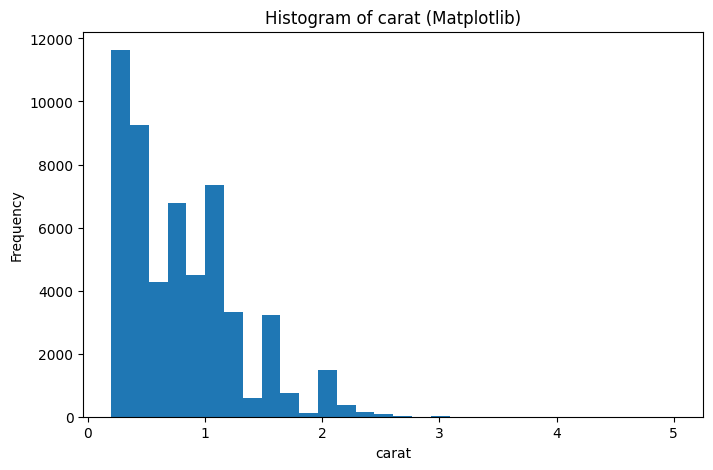

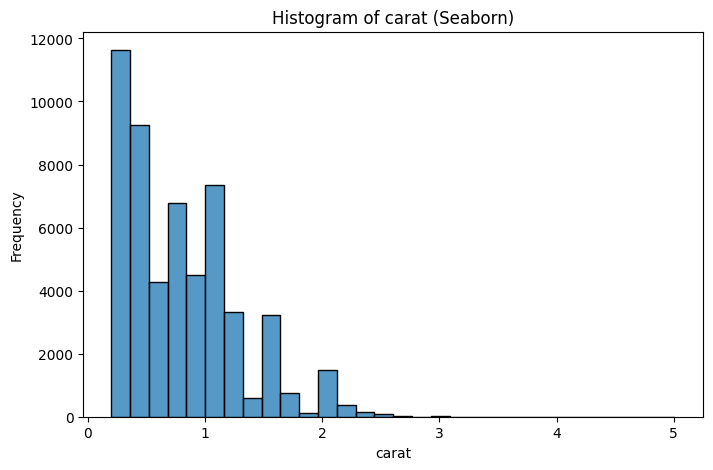

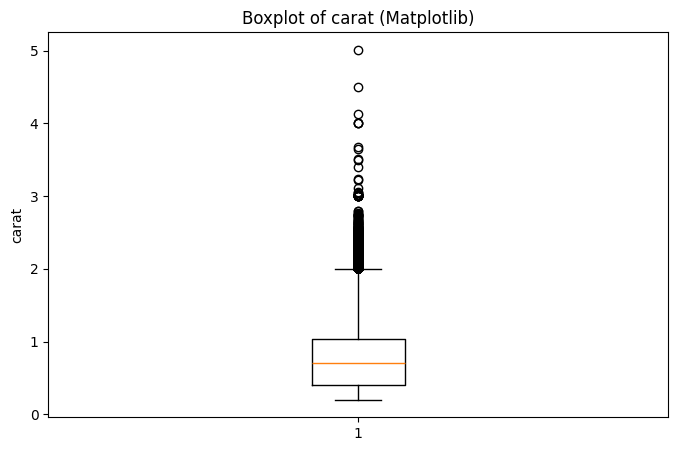

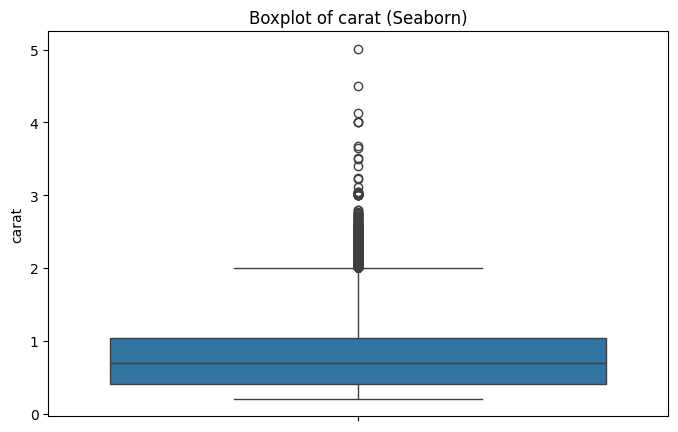

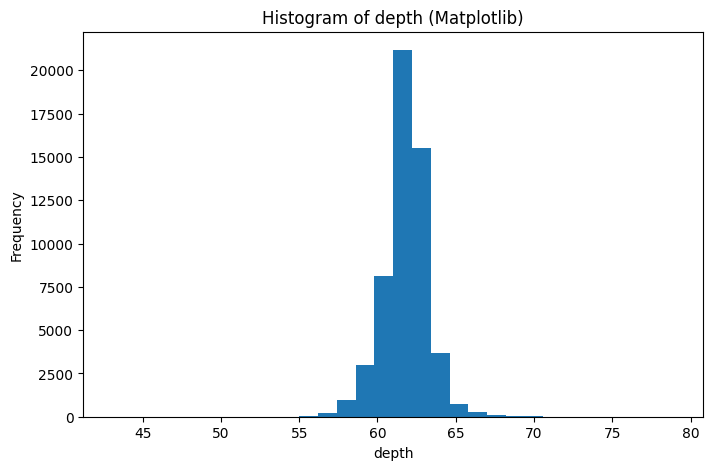

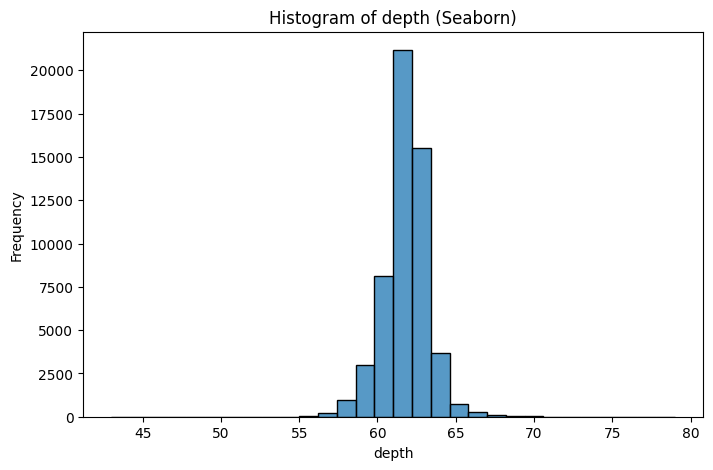

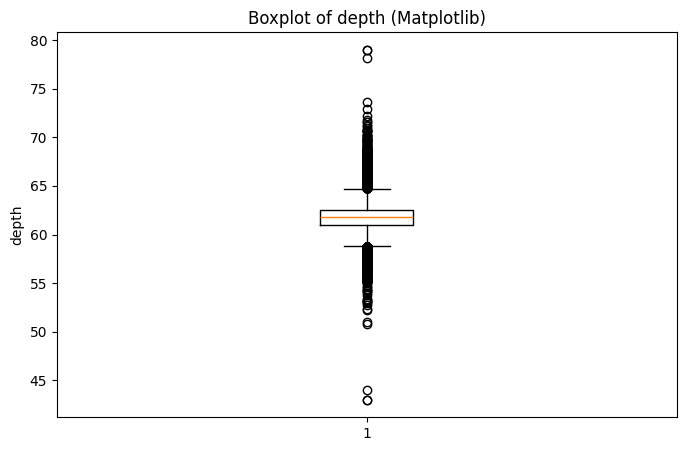

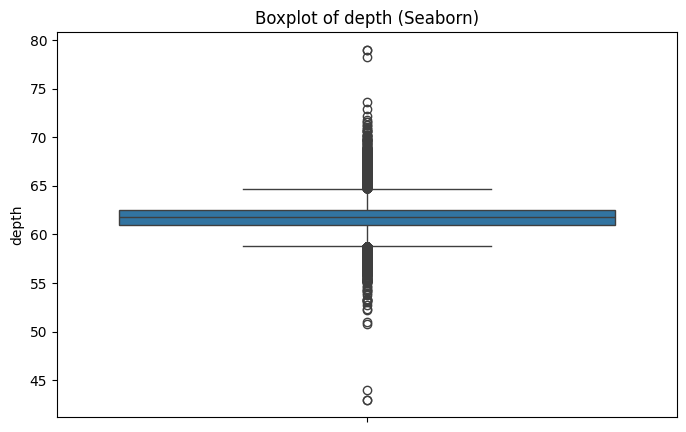

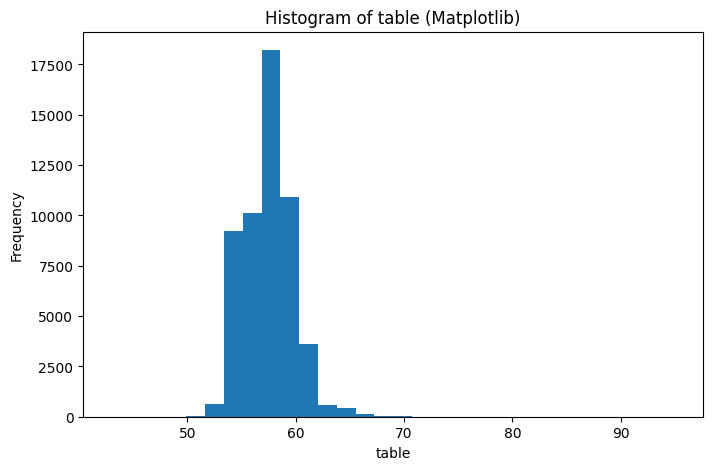

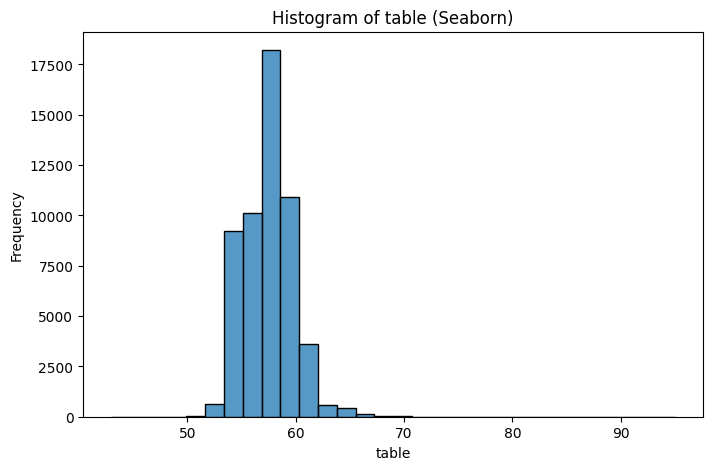

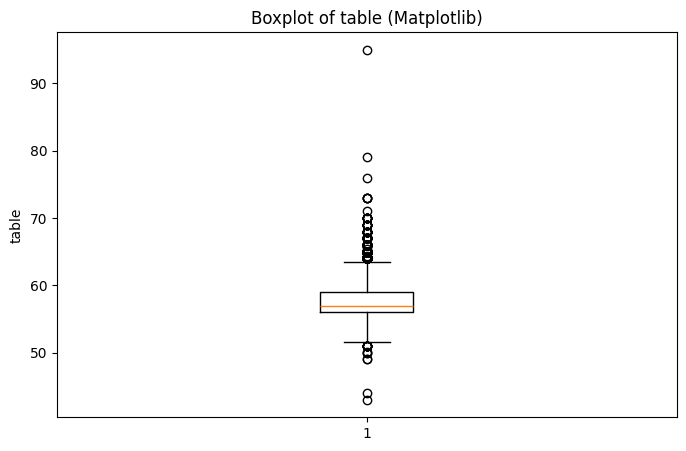

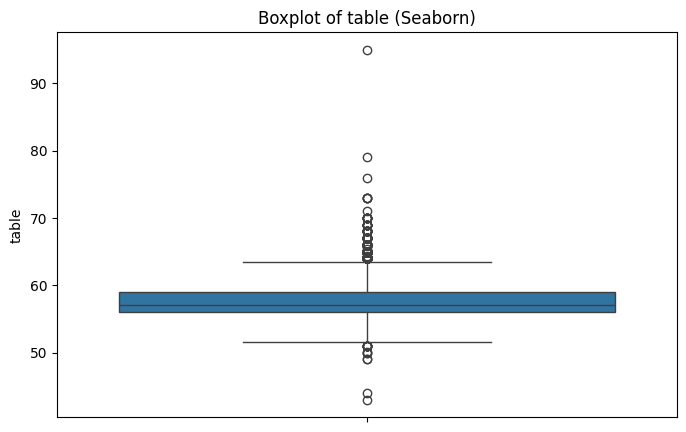

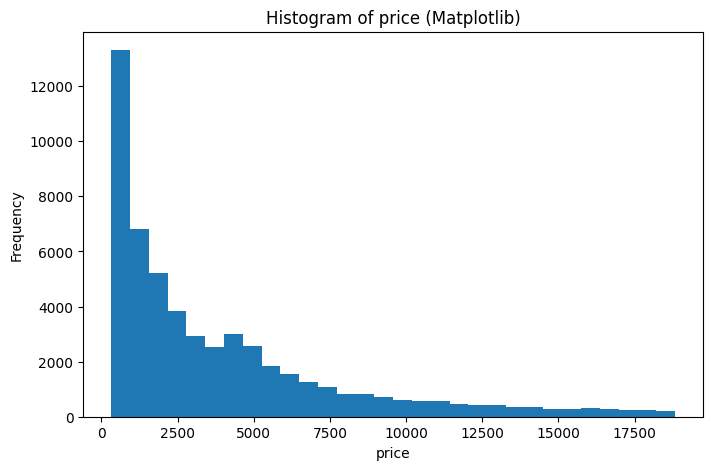

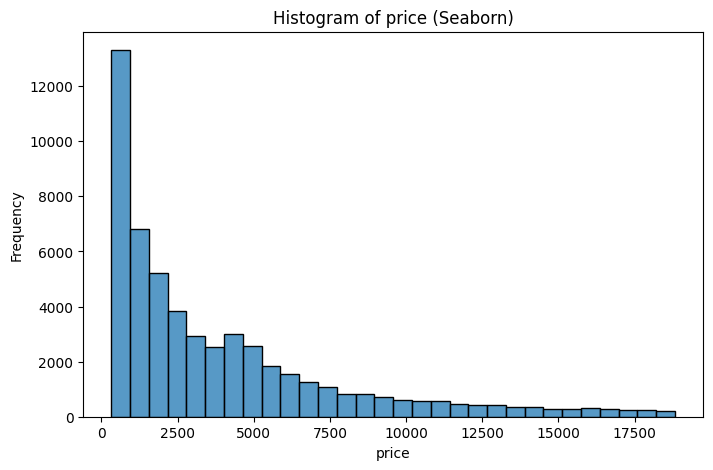

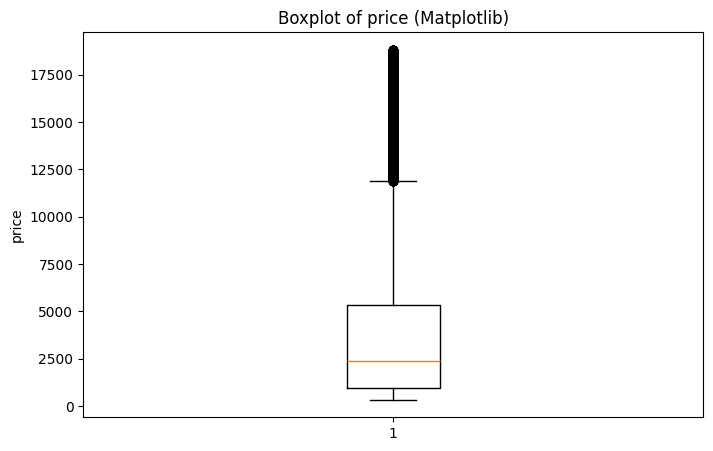

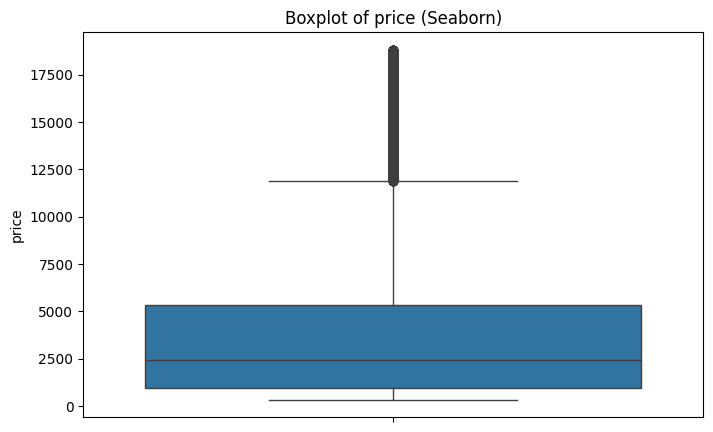

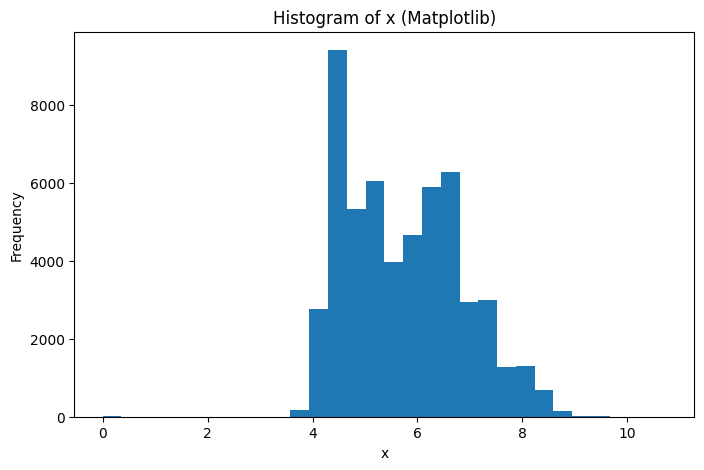

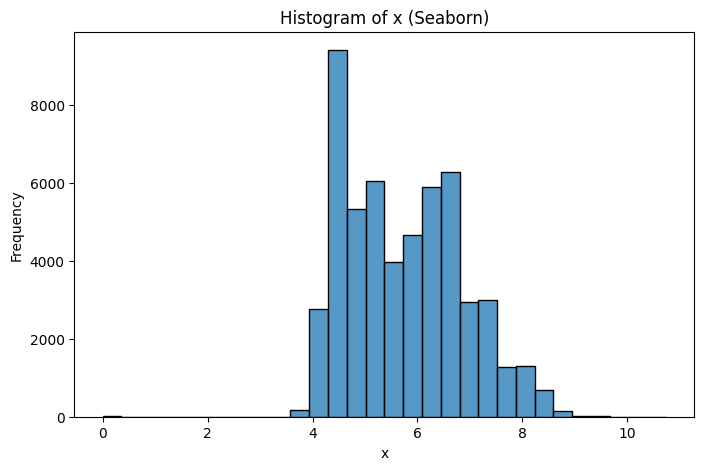

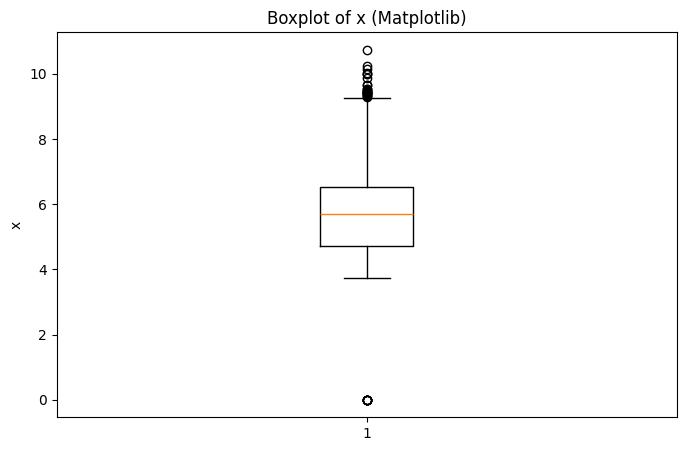

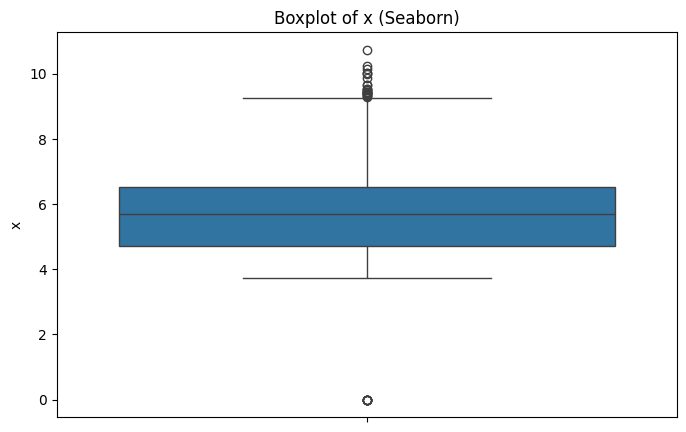

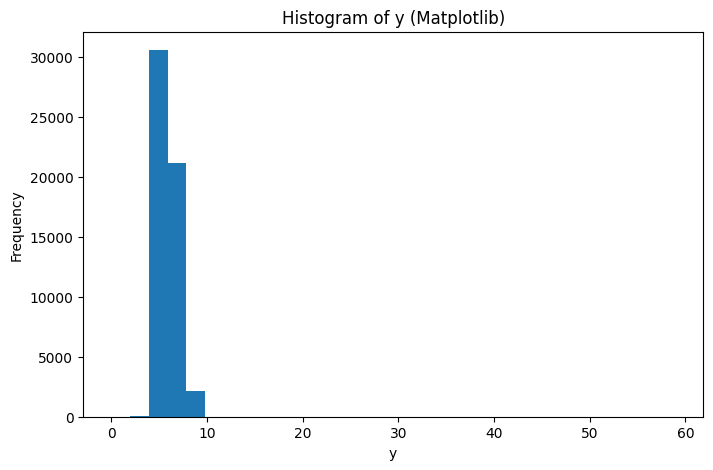

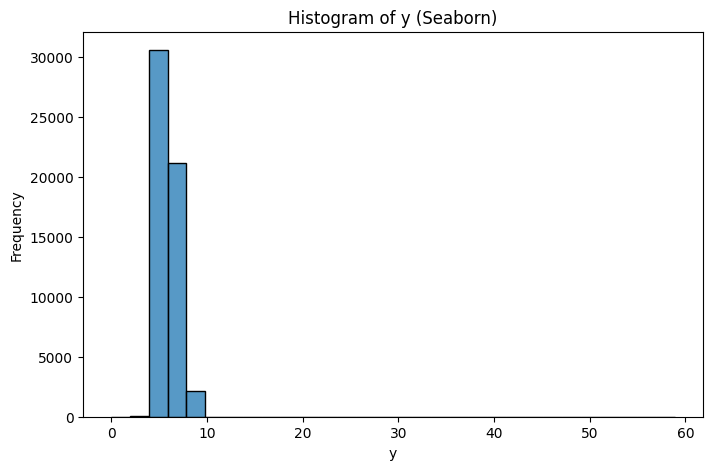

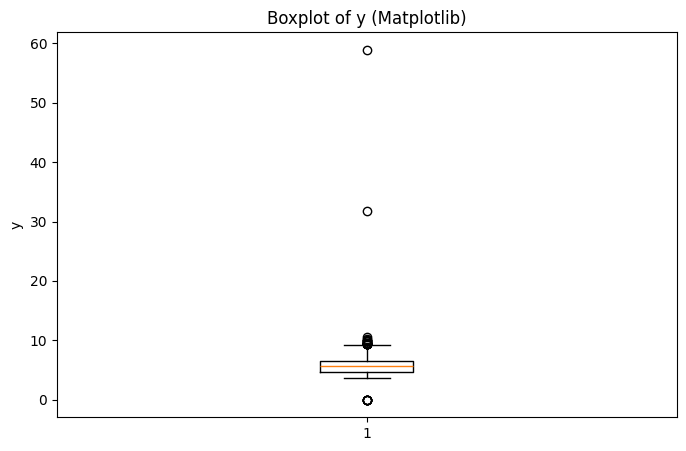

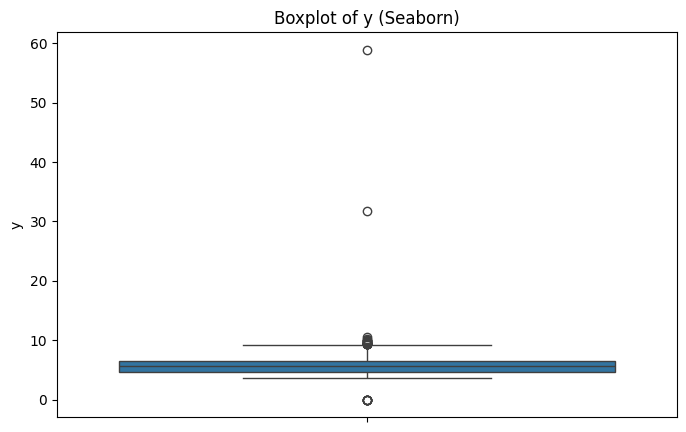

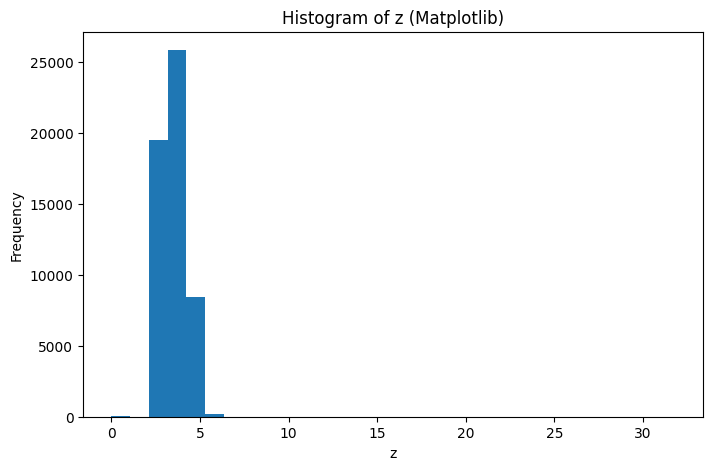

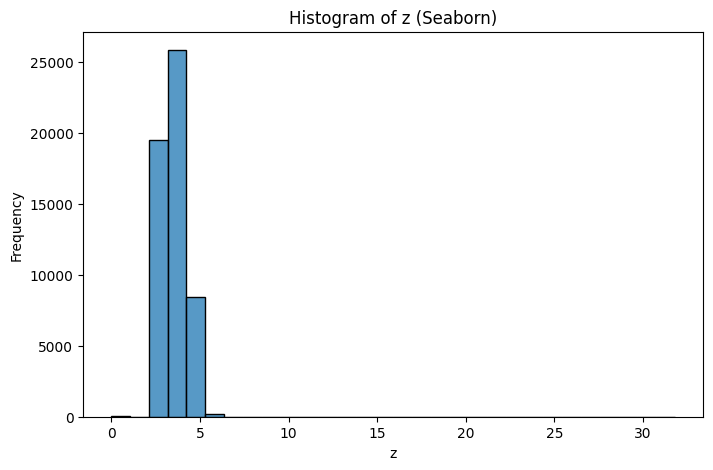

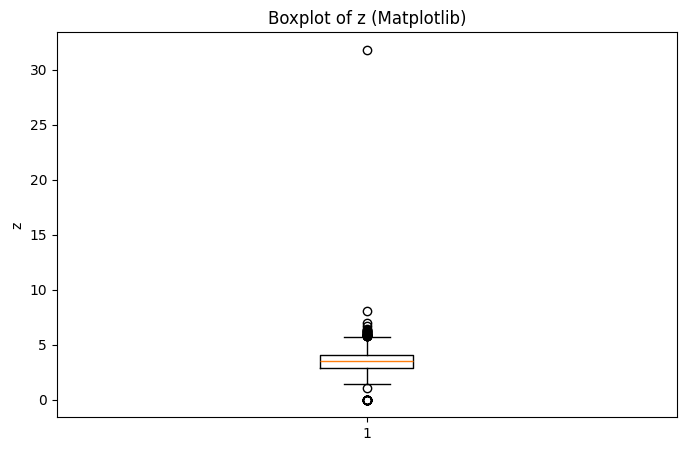

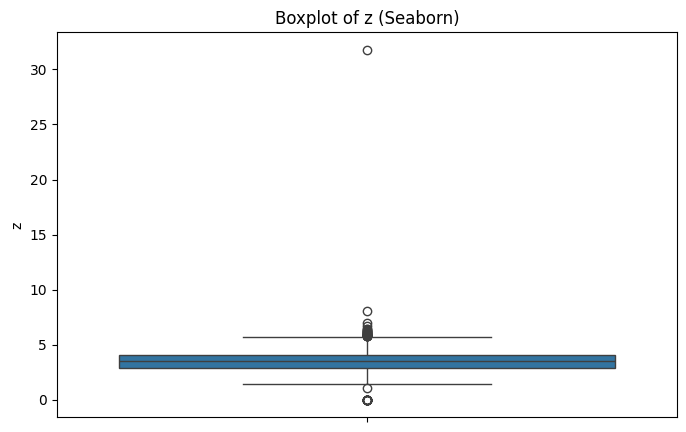

In [195]:
# Numerical attributes for plotting
numerical_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

for col in numerical_cols:
    # Matplotlib Histogram
    plt.figure(figsize=(8, 5))
    plt.hist(df[col], bins=30)
    plt.title(f'Histogram of {col} (Matplotlib)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Seaborn Histogram
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=30)
    plt.title(f'Histogram of {col} (Seaborn)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Matplotlib Boxplot
    plt.figure(figsize=(8, 5))
    plt.boxplot(df[col].dropna())
    plt.title(f'Boxplot of {col} (Matplotlib)')
    plt.ylabel(col)
    plt.show()

    # Seaborn Boxplot
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col} (Seaborn)')
    plt.ylabel(col)
    plt.show()

Numerical Attributes Summary:

* __Carat__: The histogram shows a right-skewed distribution, with most diamonds having a carat weight below 1, peaking around 0.3–0.5 carats. The boxplot confirms several outliers above 2 carats, indicating a few exceptionally large diamonds.

* __Depth__: This attribute is approximately normally distributed, centered around 61–62%, with a tight range (43–79%). The boxplot shows minor outliers, suggesting most diamonds have consistent depth proportions.

* __Table__: Also normally distributed, with a mean around 57–58%. Outliers exist beyond 70%, but the majority fall within a narrow range.

* __Price__: Highly right-skewed, with most diamonds priced below $5,000 (mean ~$3,932), and outliers extending to $18,823. This reflects a market dominated by affordable diamonds with a few premium ones.

* __x, y, z__: These dimensions (length, width, depth in mm) are right-skewed, correlating with carat size. Outliers indicate some unusually large diamonds, but most values cluster below 6–7 mm.

Outliers: Boxplots indicate significant outliers in price and dimensions, likely corresponding to rare, large, or premium diamonds.


<h4>Summary statistics for each categorical attributes to see the frequency of each category.</h4>

In [196]:
df['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [197]:
df['color'].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [198]:
df['clarity'].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

<h3>Graphical Categorical Analysis: </h3>

* Matplotlib Bar Plot
* Seaborn Bar Plot

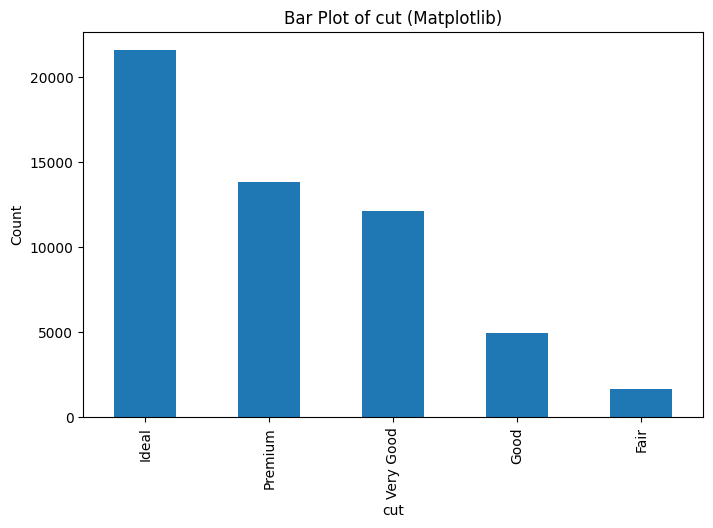

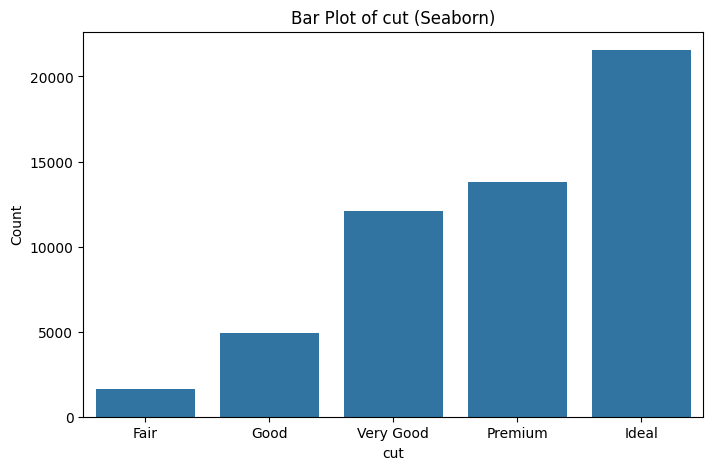

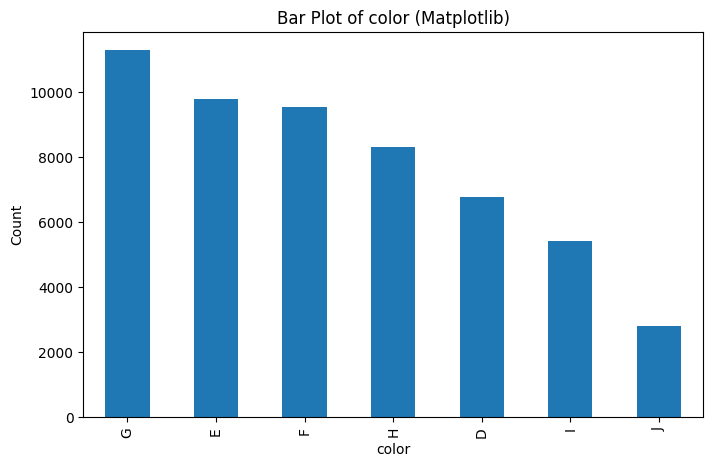

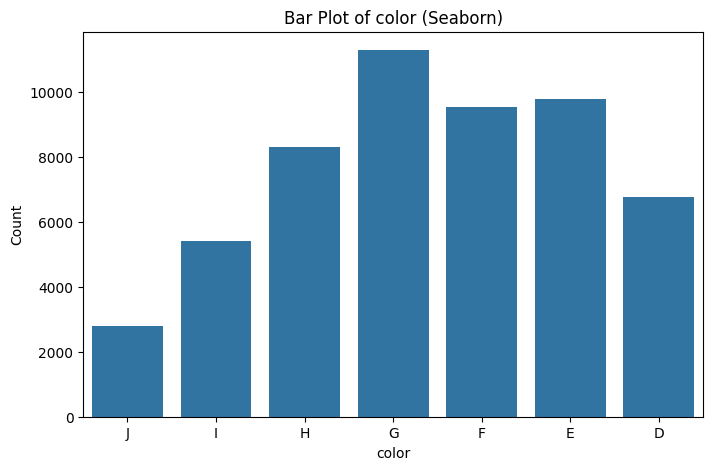

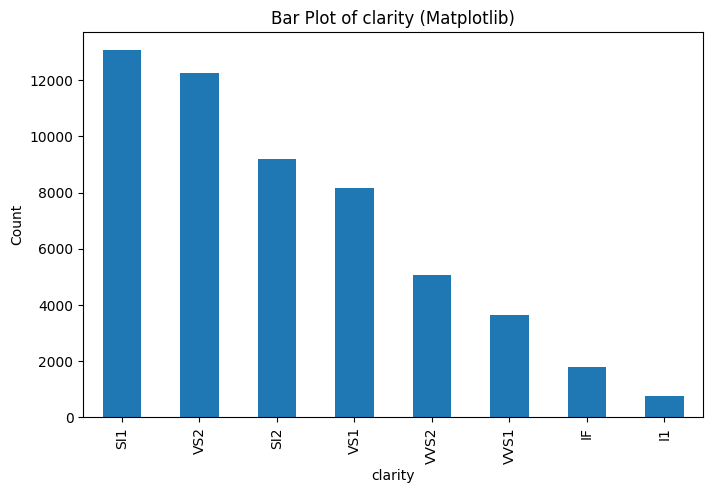

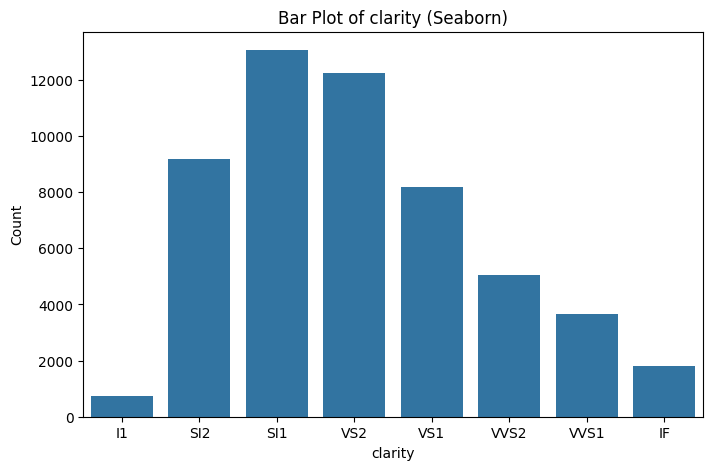

In [199]:
# Categorical attributes for plotting
categorical_cols = ['cut', 'color', 'clarity']

for col in categorical_cols:
    # Matplotlib Bar Plot
    plt.figure(figsize=(8, 5))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot of {col} (Matplotlib)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

    # Seaborn Count Plot with ordered categories
    if col == 'cut':
        order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
    elif col == 'color':
        order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
    elif col == 'clarity':
        order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
    
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df, order=order)
    plt.title(f'Bar Plot of {col} (Seaborn)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

Categorical Attributes:

* __Cut__: The bar plot reveals 'Ideal' (over 21,000 diamonds) as the most common cut, followed by 'Premium' (~14,000), with 'Fair' being the least frequent (~1,600). This suggests a preference for higher-quality cuts.

* __Color__: 'G' is the most common color (~11,000), followed by 'E' and 'F', while 'J' (worst grade) is the least (~2,800). Mid-range colors dominate the dataset.

* __Clarity__: 'SI1' is the most frequent (~13,000), followed by 'VS2' and 'SI2', with 'I1' (worst) and 'IF' (best) being less common. This indicates a mix of mid-to-high clarity grades.



The exploratory data analysis (EDA) of the diamonds dataset, comprising nearly 54,000 diamonds with attributes such as carat, cut, color, clarity, and price, uncovered several significant findings. Most diamonds are small to mid-sized, with carat weights typically below 1.5 and prices under ${\$5,000}$, though outliers exist with carat weights reaching 5.01 and prices up to ${\$18,823}$, pointing to a segment of premium, high-value diamonds. The analysis highlighted a market preference for superior craftsmanship, with "Ideal" and "Premium" cuts being the most common. Additionally, mid-tier colors like "G" and "E" and clarity grades such as "SI1" and "VS2" are predominant, reflecting a balance between quality and affordability.

<h2><u><b>Inferences</b></u></h2>

**1. What proportion of diamonds are between .30 and 1.08 carats?**

In [200]:
#Inclusive
carat = df[(df['carat'] >= 0.30) & (df['carat'] <= 1.08)]
proportion = len(carat) / len(df)
print(f"Proportion of diamonds between 0.30 and 1.08 carats (inclusive): {proportion:.4f}")

#Not including bounds
carat = df[(df['carat'] > 0.30) & (df['carat'] < 1.08)]
proportion = len(carat) / len(df)
print(f"Proportion of diamonds between 0.30 and 1.08 carats: {proportion:.4f}")

Proportion of diamonds between 0.30 and 1.08 carats (inclusive): 0.7468
Proportion of diamonds between 0.30 and 1.08 carats: 0.6940


To find the proportion of diamonds with carat values between 0.30 and 1.08 (inclusive), I filter the DataFrame to select rows where the carat column is within this range, count the matching rows, and divide by the total number of diamonds. The result is expressed as a proportion (a value between 0 and 1)

**2. How many of the diamonds have equal x and y dimensions?**

In [201]:
# Count diamonds with equal x and y dimensions
equal_xy = len(df[df['x'] == df['y']])

print(f"Number of diamonds with equal x and y dimensions: {equal_xy}")

Number of diamonds with equal x and y dimensions: 17


To determine how many diamonds have equal x and y dimensions, I compare the x and y columns (representing length and width in mm) and count the rows where they are exactly equal. Since x and y are float64 values, I use direct equality comparison, assuming the data is precise to the recorded decimal places.

**3. How many of the diamonds have a carat value that is less than the mean carat value?**

In [202]:
# Calculate mean carat value and count diamonds below it
mean_carat = df['carat'].mean()
below_mean_carat = len(df[df['carat'] < mean_carat])

print(f"Mean carat value: {mean_carat:.3f}")
print(f"Number of diamonds with carat value less than the mean: {below_mean_carat}")

Mean carat value: 0.798
Number of diamonds with carat value less than the mean: 31127


To find the number of diamonds with a carat value less than the mean, I calculate the mean carat value using df['carat'].mean() and then count the rows where the carat column is less than this value.

__4. How many diamonds have a Premium cut or better? Note that the possible values for the quality of a
cut are ranked in ascending order as follows: *Fair / Good / Very Good / Premium / Ideal*__

In [203]:
# Count diamonds with Premium or Ideal cut
premium_or_better = len(df[df['cut'].isin(['Premium', 'Ideal'])])

print(f"Number of diamonds with a Premium cut or better: {premium_or_better}")

Number of diamonds with a Premium cut or better: 35342


The cut quality is ranked in ascending order: Fair, Good, Very Good, Premium, Ideal. A "Premium cut or better" includes Premium and Ideal cuts. I filter the DataFrame to select rows where cut is either 'Premium' or 'Ideal' and count the matching rows.

**5. Which diamond has the highest price per carat? What is its value?**

In [204]:
# Calculate price per carat
df['price_per_carat'] = df['price'] / df['carat']

# Find the diamond with the highest price per carat
max_ppc_row = df.loc[df['price_per_carat'].idxmax()]

print(f"Diamond with the highest price per carat:")
print(f"Index: {max_ppc_row.name}")
print(f"Carat: {max_ppc_row['carat']}")
print(f"Price: ${max_ppc_row['price']}")
print(f"Price per carat: ${max_ppc_row['price_per_carat']:.2f}")
print(f"Cut: {max_ppc_row['cut']}, Color: {max_ppc_row['color']}, Clarity: {max_ppc_row['clarity']}")

Diamond with the highest price per carat:
Index: 27635
Carat: 1.04
Price: $18542
Price per carat: $17828.85
Cut: Very Good, Color: D, Clarity: IF


To find the diamond with the highest price per carat, I calculate the price per carat by dividing the price column by the carat column, create a new column for this metric, and identify the row with the maximum value. I then extract the price per carat and relevant details of the diamond (e.g., index, carat, price).

**6. Using both Matplolib and Seaborn, make boxplots of the diamond price for each distinct cut value and discuss any conclusions you can draw from the appearance of the boxplots.**

<Figure size 1000x600 with 0 Axes>

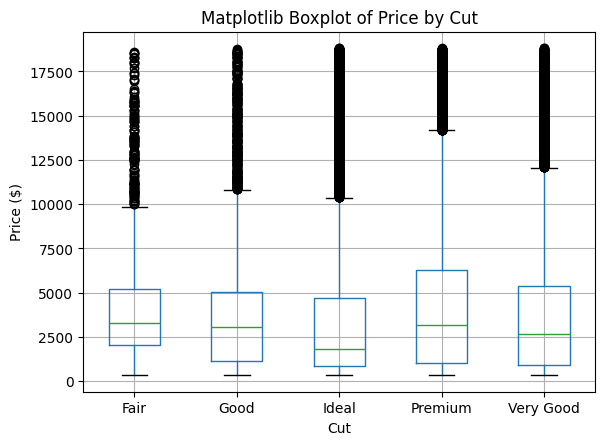

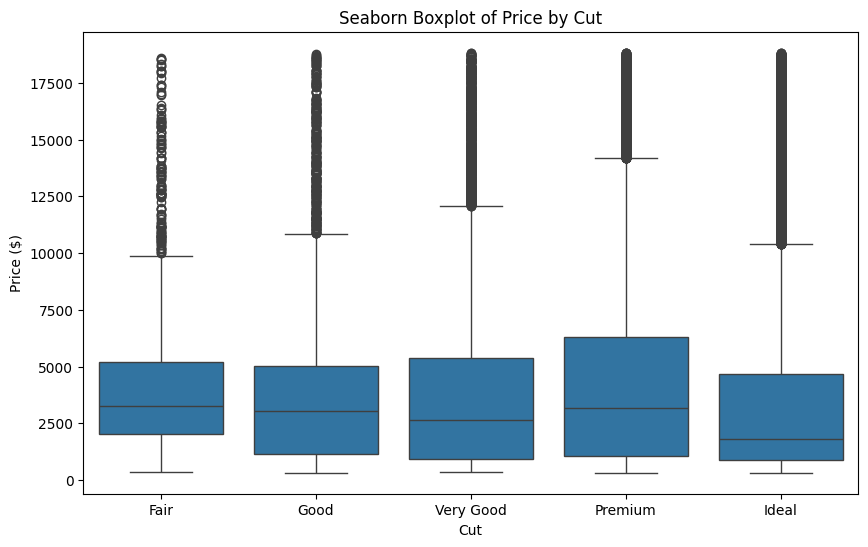

In [205]:
# Define the order of cuts (Fair to Ideal)
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

# Matplotlib Boxplot
plt.figure(figsize=(10, 6))
df.boxplot(column='price', by='cut')
plt.title('Matplotlib Boxplot of Price by Cut')
plt.xlabel('Cut')
plt.ylabel('Price ($)')
plt.suptitle('')  # Remove default title
plt.show()

# Seaborn Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cut', y='price', order=cut_order)
plt.title('Seaborn Boxplot of Price by Cut')
plt.xlabel('Cut')
plt.ylabel('Price ($)')
plt.show()

To create boxplots of diamond price for each distinct cut value (Fair, Good, Very Good, Premium, Ideal), I use Matplotlib and Seaborn to visualize the distribution of prices across cut categories. The boxplots show the median, quartiles, and potential outliers for each cut, with the cut categories ordered from lowest (Fair) to highest (Ideal) quality. The analysis examines differences in price distributions and draws conclusions about the relationship between cut quality and price.

__Observation__: The boxplots indicate that "Ideal" and "Premium" cuts have higher median prices and wider price ranges, with more high-priced outliers. "Fair" cuts show lower medians and fewer outliers, suggesting that better cut quality correlates with higher and more variable prices.

**7. Using both Matplolib and Seaborn, make a scatter plot of price vs. carat. What can we say about the relationship between those two attributes?**

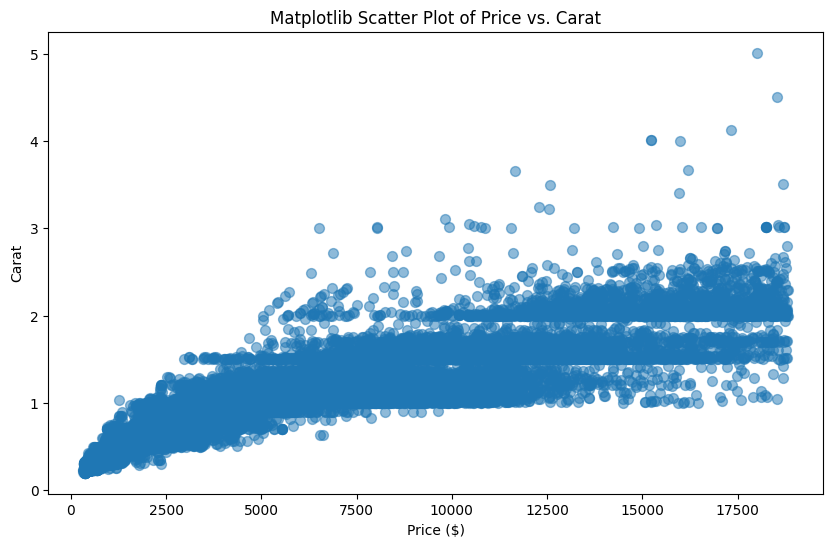

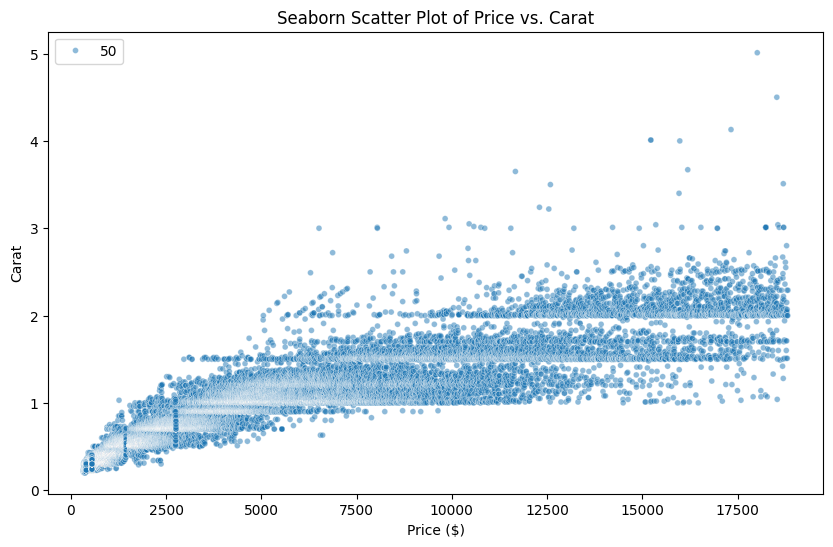

In [206]:
# Matplotlib Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['carat'], alpha=0.5, s=50)
plt.title('Matplotlib Scatter Plot of Price vs. Carat')
plt.xlabel('Price ($)')
plt.ylabel('Carat')
plt.show()

# Seaborn Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='carat', alpha=0.5, size=50)
plt.title('Seaborn Scatter Plot of Price vs. Carat')
plt.xlabel('Price ($)')
plt.ylabel('Carat')
plt.show()

To explore the relationship between price and carat, I create scatter plots using Matplotlib and Seaborn, plotting price (y-axis) against carat (x-axis). The scatter plots visualize the data points for all 53,940 diamonds, allowing assessment of the correlation and trends between these attributes.

__Observations__: The scatter plots reveal a positive relationship between carat and price: larger carats generally correspond to higher prices. However, the spread increases with carat size, indicating that price is influenced by additional factors beyond carat weight, such as cut, color, or clarity.

<h3><u><b>Conclusion</b></u></h3>

In conlcusion, this analysis of the diamond dataset, containing 53,940 entries, highlights key trends in diamond characteristics and pricing. Most diamonds fall within mid-range carat sizes (0.30 to 1.08 carats), and cut quality significantly impacts price, with "Premium" and "Ideal" cuts commanding higher values. The relationship between carat and price is positive but variable, suggesting that multiple attributes determine diamond value.

<h4><u><b>Reference</b></u></h4>

 * [ggplot2](https://ggplot2.tidyverse.org/reference/diamonds.html#ref-usage)

 * [Seaborn](https://seaborn.pydata.org/tutorial/distributions.html)

 * [Pandas](https://pandas.pydata.org/docs/)

 * [Matplotlib](https://matplotlib.org/stable/users/index.html)

 * [Wikipedia](https://en.wikipedia.org/wiki/Diamond)

 * [Youtube video 1](https://www.youtube.com/watch?v=Y_l0OzPCrno)

 * [Youtube video 2](https://www.youtube.com/watch?v=LnGz20B3nTU)

 * [Udemy](https://www.udemy.com/course/python-for-all-with-a-focus-on-financial-applications/learn/lecture/24099026#content)